<i>Copyright (c) Microsoft Corporation. All rights reserved.</i>

<i>Licensed under the MIT License.</i>

# Quickstart: Web Cam Object Tracking


This notebook shows a simple example of loading a pretrained (TYPE OF MODEL HERE) model for object detection from a webcam stream using the (PACKAGE TYPE HERE E.g.`torchvision`) package.

To understand the basics of multi-object tracking, please visit our [FAQ](FAQ.md).  For more details about the underlying technology, including finetuning, please see our [training introduction notebook](01_training_introduction.ipynb).

## Prerequisite for Webcam example 
This notebook assumes you have **a webcam** connected to your machine.  We use the `ipywebrtc` module to show the webcam widget in the notebook. Currently, the widget works on **Chrome** and **Firefox** (AND MAYBE THE NEW **EDGE** BROWSER). For more details about the widget, please visit `ipywebrtc` [github](https://github.com/maartenbreddels/ipywebrtc) or [documentation](https://ipywebrtc.readthedocs.io/en/latest/).

## Initialization

In [1]:
# Regular Python libraries
import io
import os
import sys
import time
import urllib.request
import matplotlib.pyplot as plt

# IPython
import scrapbook as sb
from ipywebrtc import CameraStream, ImageRecorder
from ipywidgets import HBox, Layout, widgets, Widget

# Image
from PIL import Image

# TorchVision
import torchvision
from torchvision import transforms as T

# utils_cv
sys.path.append("../../")
from utils_cv.common.data import data_path
from utils_cv.common.gpu import which_processor, is_windows
from utils_cv.detection.data import coco_labels
from utils_cv.detection.model import DetectionLearner
from utils_cv.detection.plot import PlotSettings, plot_boxes

# Change matplotlib backend so that plots are shown for windows
if is_windows():
    plt.switch_backend('TkAgg')

print(f"TorchVision: {torchvision.__version__}")
which_processor()

TorchVision: 0.4.0
Torch is using GPU: GeForce GTX 1060


This shows your machine's GPUs (if it has any) and the computing device `torch/torchvision` is using.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Load Pretrained Model (SECTION TO BE UPDATED WITH NEW MODEL)

We will start with a pretrained (MODEL TYPE) model which is (QUICK DESCRIPTION). 

(BACKGROUND ON THE MODEL HERE IS THE EXAMPLE FROM OBJECT DETECTION SCENARIO): The [reported box AP](https://pytorch.org/docs/stable/torchvision/models.html#object-detection-instance-segmentation-and-person-keypoint-detection) is 37.0 trained on the instances set of COCO train2017 and evaluated on COCO val2017.  [COCO](http://cocodataset.org) is a popular dataset in the research community and consists of 330K images with more than 200K annotated objects of [91 distinct classes](https://pytorch.org/docs/stable/torchvision/models.html#object-detection-instance-segmentation-and-person-keypoint-detection) such as person, car, boat, or cup.

To _speed up_ model inference we restrict processing to use _at most_ an image resolution of 200 pixels, and _only_ use up to 5 candidate object proposals per image.

# Load Pretrained Model 
For the purposes of outlining, we will be importing an off the shelve algo from opencv


In [14]:
import cv2
trackers = cv2.MultiTracker_create()

ModuleNotFoundError: No module named 'cv2'

Next, we just need to pass this model into our `DetectionLearner` object, and add the pre-defined coco-labels.

In [4]:
detector = DetectionLearner(
    model=model, 
    labels=coco_labels()[1:],  # we use [1:] because the first element of the array is '__background__'
)

# Object Tracking

## From Video File
First, we prepare a video of a ball rolling to show an example of how to track a single object by using the model.

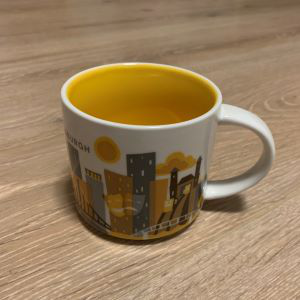

In [5]:
# Download an example image
IM_URL = "https://cvbp.blob.core.windows.net/public/images/cvbp_cup.jpg"
im_path = os.path.join(data_path(), "example.jpg")
urllib.request.urlretrieve(IM_URL, im_path)

im = Image.open(im_path)
im

Using the `predict()` method, we ask the model to detect how many objects and what they are on this image.  In this case, the only object is "cup".

In [6]:
detections = detector.predict(im)

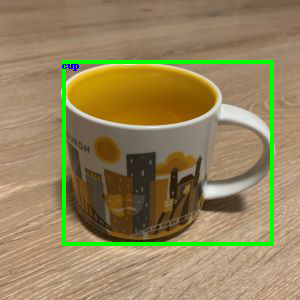

In [7]:
plot_boxes(im, detections["det_bboxes"], plot_settings=PlotSettings(rect_color=(0, 255, 0)))

In [8]:
detections

{'det_bboxes': [{Bbox object: [left=62, top=60, right=273, bottom=245] | <cup> | label:47 | path:None} | score: 0.9996309280395508],
 'im_path': None}

## From WebCam Stream

Now, we use a WebCam stream for object detection. We use `ipywebrtc` to start a webcam and get the video stream which is sent to the notebook's widget.

In [26]:
# Webcam
w_cam = CameraStream(
    constraints={ 
        'facing_mode': 'user',
        'audio': False,
        'video': { 'width': 200, 'height': 200 }
    },
    layout=Layout(width='200px')
)


# def detect_frame(_):
#     """ Detect objects on an image snapshot by using a pretrained model
#     """
#     # Once capturing started, remove the capture widget since we don't need it anymore
#     if w_imrecorder.layout.display != 'none':
#         w_imrecorder.layout.display = 'none'
        
#     try:
#         # Get the image and convert to RGB
#         im = Image.open(io.BytesIO(w_imrecorder.image.value)).convert('RGB')
        
#         # Process the captured image
#         # grab the updated bounding box coordinates (if any) for each
#         # object that is being tracked
#         (success, boxes) = trackers.update(im)
#         # loop over the bounding boxes and draw then on the frame
#         for box in boxes:
#             (x, y, w, h) = [int(v) for v in box]
#             cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)
# #         detections = detector.predict(im)
# #         plot_boxes(im, detections["det_bboxes"], plot_settings=PlotSettings(rect_color=(0, 255, 0)))
        
#         # Convert the processed image back into the image widget for display
#         f = io.BytesIO()
#         im.save(f, format='png')
#         w_im.value = f.getvalue()
        
#     except OSError:
#         # If im_recorder doesn't have valid image data, skip it. 
#         pass
    
#     # Taking the next snapshot programmatically
#     w_imrecorder.recording = True

# Register detect_frame as a callback. Will be called whenever image.value changes. 
# w_imrecorder.image.observe(detect_frame, 'value')

NameError: name 'VideoRecorder' is not defined

In [27]:
# Show widgets
HBox([w_cam])

Now, click the **capture button** in the widget to start object detection. Labels and bounding boxes are displayed to show  the most probable objects predicted by the model for an image snapshot.

![Example Webcam Image](media/00_webcam_snapshot.png)

# Conclusion
In this notebook, we used a simple example to demonstrate how to use a pretrained model to detect objects on images. The model is limited to only predict object labels that are part of the COCO training samples. In the [training introduction notebook](01_training_introduction.ipynb), we will learn how to fine-tune a model on our own data.

In [28]:
# Stop the model and webcam
Widget.close_all()

In [12]:
# Preserve some of the notebook outputs
detections = [
    (x.label_idx, x.label_name, [(x.left, x.top), (x.right, x.bottom)]) 
    for x in detections["det_bboxes"]
]
sb.glue("detection_bounding_box", detections)